# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# load loan data

In [2]:
loan_data = pd.read_csv("loan.csv")
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
loan_data.shape

(39717, 111)

persentage of nulls

In [4]:
missing = round(100*(loan_data.isnull().sum()/len(loan_data.id)), 2)
missing.loc[missing > 0]

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

#removing null values as there are so many null values in the loan data

In [5]:
missing_columns = loan_data.columns[100*(loan_data.isnull().sum()/len(loan_data.index)) > 30]
print(missing_columns)

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
     

In [6]:
#drop the columns which has more than 30
loan_data = loan_data.drop(missing_columns, axis=1)
print(loan_data.shape)

(39717, 53)


In [7]:
missing = round(100*(loan_data.isnull().sum()/len(loan_data.id)), 2)
missing

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

In [8]:
round(loan_data.isnull().sum()/len(loan_data)*100, 2).loc[lambda x : x > 0]

emp_title                     6.19
emp_length                    2.71
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

In [9]:
loan_data.dropna(subset=['emp_length','revol_util','last_pymnt_d','last_credit_pull_d', 'pub_rec_bankruptcies'], inplace=True)
loan_data.reset_index(drop=True, inplace=True)

#Removal of uniqe values 

In [10]:
# we will remove all columns which has only one uniqe value as it won't give much info
loan_data.nunique()

id                            37835
member_id                     37835
loan_amnt                       869
funded_amnt                    1031
funded_amnt_inv                7748
term                              2
int_rate                        337
installment                   14720
grade                             7
sub_grade                        35
emp_title                     28213
emp_length                       11
home_ownership                    4
annual_inc                     5027
verification_status               3
issue_d                          52
loan_status                       3
pymnt_plan                        1
url                           37835
purpose                          14
title                         18677
zip_code                        809
addr_state                       49
dti                            2863
delinq_2yrs                      11
earliest_cr_line                514
inq_last_6mths                    9
open_acc                    

In [11]:
# we will remove all columns which has only one uniqe value as it won't give much info
loan_data.drop(columns=loan_data.columns[loan_data.nunique()==1], inplace=True)

In [12]:
loan_data.nunique().sort_values()


term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     81
last_credit_pull_d            97
last_pymnt_d                  97
int_rate                     337
earliest_cr_line             514
zip_code                     809
loan_amnt                    869
funded_amnt                 1031
revol_util                  1087
out_prncp                   1096
out_prncp_inv               1097
total_rec_late_fee          1274
collection_recovery_fee     2488
dti                         2863
recoveries                  3780
annual_inc

In [13]:
loan_data.reset_index(drop=True, inplace=True)

In [14]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37835 entries, 0 to 37834
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       37835 non-null  int64  
 1   member_id                37835 non-null  int64  
 2   loan_amnt                37835 non-null  int64  
 3   funded_amnt              37835 non-null  int64  
 4   funded_amnt_inv          37835 non-null  float64
 5   term                     37835 non-null  object 
 6   int_rate                 37835 non-null  object 
 7   installment              37835 non-null  float64
 8   grade                    37835 non-null  object 
 9   sub_grade                37835 non-null  object 
 10  emp_title                36442 non-null  object 
 11  emp_length               37835 non-null  object 
 12  home_ownership           37835 non-null  object 
 13  annual_inc               37835 non-null  float64
 14  verification_status   

In [15]:
loan_data.iloc[0]

id                                                                   1077501
member_id                                                            1296599
loan_amnt                                                               5000
funded_amnt                                                             5000
funded_amnt_inv                                                         4975
term                                                               36 months
int_rate                                                              10.65%
installment                                                           162.87
grade                                                                      B
sub_grade                                                                 B2
emp_title                                                                NaN
emp_length                                                         10+ years
home_ownership                                                          RENT

if we absorve the above one we can say the int64 feild int_rate have an extention % and float value of revol_util has the same

In [16]:
loan_data['int_rate'] = loan_data.int_rate.str.strip('%').astype(float)
loan_data['revol_util'] = loan_data.revol_util.str.strip('%').astype(float)

Removing rows with loan status as Current beacuse for doing analysis we will only consider with laon status as Fully paid or charged off.

In [17]:
loan_data['issue_d'] = pd.to_datetime(loan_data.issue_d, format='%b-%y')
loan_data['issue_d'] = loan_data['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2021 else x)

loan_data['earliest_cr_line'] = pd.to_datetime(loan_data.earliest_cr_line, format='%b-%y')
loan_data['earliest_cr_line'] = loan_data['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2021 else x)

loan_data["term"]=loan_data["term"].apply(lambda x: x.replace('months',''))

In [18]:
loan_data.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                    datetime64[ns]
loan_status                        object
url                                object
purpose                            object
title                              object
zip_code                           object
addr_state                         object
dti                               float64
delinq_2yrs                       

In [19]:
#Rename column dti to debt_to_income
loan_data.rename(columns = {'dti':'debt_to_income'}, inplace = True)

In [20]:
loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,debt_to_income,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,1996-01-01,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37830,154154,151536,4800,4800,1100.0,36,10.28,155.52,C,C1,E.E. Wine Inc,1 year,RENT,35000.0,Not Verified,2007-11-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Want to pay off high intrest cards,226xx,VA,7.51,0,2000-03-01,0,11,1,5836,68.7,12,0.00,0.00,5134.085288,1176.56,4800.00,334.09,0.00,0.00,0.00,Aug-08,3891.08,Aug-08,1.0
37831,150940,150893,7000,7000,1000.0,36,10.59,227.82,C,C2,NaN,3 years,MORTGAGE,63500.0,Not Verified,2007-11-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Taking the First Step by Consolidating,853xx,AZ,8.50,0,1989-02-01,1,9,1,14930,79.0,21,0.00,0.00,8174.021910,1167.72,7000.00,1174.02,0.00,0.00,0.00,May-10,1571.29,Apr-16,1.0
37832,132892,132889,9000,9000,700.0,36,12.49,301.04,D,D3,Maximus,8 years,MORTGAGE,39000.0,Not Verified,2007-10-01,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Pay off debt,207xx,MD,5.08,0,1997-08-01,3,9,1,26233,62.9,37,0.00,0.00,4015.960000,311.64,1496.83,609.26,0.00,1909.87,668.36,May-08,301.05,May-16,1.0
37833,119043,119040,15450,15450,600.0,36,11.22,507.46,C,C4,ARIN,2 years,MORTGAGE,40000.0,Not Verified,2007-08-01,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,paying credit cards and doctor bill.,201xx,VA,13.50,0,1992-11-01,3,13,1,6513,34.3,29,0.00,0.00,11652.750000,451.73,8688.59,2659.96,0.00,304.20,3.09,Oct-09,1016.15,Mar-10,1.0


In [21]:
#id,member_id -->A unique LC assigned Id for the borrower member. #MAY NOT BE NEEDED as this is unique to each member
#url --> URL for the LC page with listing data. #MAY NOT BE NEEDED as this is url
#zip_code --> NOT NEEDED as this can be get from address
#term --> # Could be a good column to keep for the duration as 36 months & 60 months
#int_rate --> #used to check the trend of interest rates for customers
#installment --> MAY BE NEEDED - can be seen if trhere is any trend in installamounts for charged off loans 
#home_ownership --> GOOD TO KEEP 
#employee_length -->  NOT NEEDED
#annual_inc --> GOOD TO KEEP - self-reported annual income provided by the borrower during registration
#verification_status --> MAY NOT BE NEEDED - Indicates if income was verified by LC, not verified, or if the income source was verified
#loan_status --> GOOD TO KEEP : Fully Paid, Charged Off, Current
#purpose --> NEED TO KEEP as have the purpose for loan 
#addr_state --> NEED to KEEP as we can see if there is any trend based on location
#debt_to_income --> to see if there is ant trend based on debt to income
#delinq_2yrs --> MAY BE GOOD TO KEEP - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
#earliest_cr_line --> NEED TO DROP looks to be redundant
#inq_last_6mths --> MAY BE REQUIRED to see if there is any trend with loan status
#open_acc, pub_rec, revol_bal, revol_util, total_acc NEED TO DROP looks to be redundant
#initial_list_status --> GOOD TO DROP as has only 1 value 'F' 
#out_prncp --> Remaining outstanding principal for total amount funded. MAY/MAY NOT BE NEEDED 
#out_prncp_inv -->Remaining outstanding principal for portion of total amount funded by investors -CAN BE DROPPED
#total_pymnt,total_pymnt_inv,total_rec_prncp, total_rec_int,total_rec_late_fee LOOKS IRRELEVANT & CAN BE DROPPED
#recoveries --> MAY NOT BE NEEDED - post charge off gross recovery
#collection_recovery_fee --> MAY NOT BE NEEDED - post charge off collection fee
#application_type --> NEED TO DROP has same values for all the rows i.e; INDIVIDUAL
#acc_now_delinq, delinq_amnt --> NEED TO DROP has same value for all the rows i.e; 0
#loan_amnt --> GOOD TO KEEP
#funded_amnt,funded_amnt_inv --> Both has similar values, So DROP one funded_amnt_inv as funded_amnt looks original one
#Grade, Subgrade,issue_d --> GOOD TO KEEP
#total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee --> MAY NOT BE NEEDED

In [22]:
loan_data = loan_data[['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'debt_to_income', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec',
       'revol_util', 'last_pymnt_amnt', 'pub_rec_bankruptcies']]
loan_data

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,debt_to_income,delinq_2yrs,inq_last_6mths,pub_rec,revol_util,last_pymnt_amnt,pub_rec_bankruptcies
0,5000,5000,36,10.65,162.87,B,B2,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1,0,83.7,171.62,0.0
1,2500,2500,60,15.27,59.83,C,C4,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,5,0,9.4,119.66,0.0
2,2400,2400,36,15.96,84.33,C,C5,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2,0,98.5,649.91,0.0
3,10000,10000,36,13.49,339.31,C,C1,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1,0,21.0,357.48,0.0
4,3000,3000,60,12.69,67.79,B,B5,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,0,0,0,53.9,67.79,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37830,4800,4800,36,10.28,155.52,C,C1,RENT,35000.0,Not Verified,2007-11-01,Fully Paid,debt_consolidation,VA,7.51,0,0,1,68.7,3891.08,1.0
37831,7000,7000,36,10.59,227.82,C,C2,MORTGAGE,63500.0,Not Verified,2007-11-01,Fully Paid,debt_consolidation,AZ,8.50,0,1,1,79.0,1571.29,1.0
37832,9000,9000,36,12.49,301.04,D,D3,MORTGAGE,39000.0,Not Verified,2007-10-01,Charged Off,debt_consolidation,MD,5.08,0,3,1,62.9,301.05,1.0
37833,15450,15450,36,11.22,507.46,C,C4,MORTGAGE,40000.0,Not Verified,2007-08-01,Charged Off,debt_consolidation,VA,13.50,0,3,1,34.3,1016.15,1.0


In [23]:
#function used for ploting
def plot_univariant(col,title):
  #Increasing the figure size of plot
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  #Histogram plot
  sns.distplot(a=loan_data[col], rug=True)
  plt.subplot(1,2,2)
  sns.boxplot(y=loan_data[col])
  plt.suptitle(title)
  plt.show()

def plot_univariant_countplot(df,title,xl,yl):
  plt.figure(figsize=[30,7])
  plt.subplot(1,2,1)
  sns.countplot(df)
  plt.title(title)
  plt.xlabel(xl)
  plt.ylabel(yl)
  plt.show()

#UNIVARIANT Analysis

Loan_amount

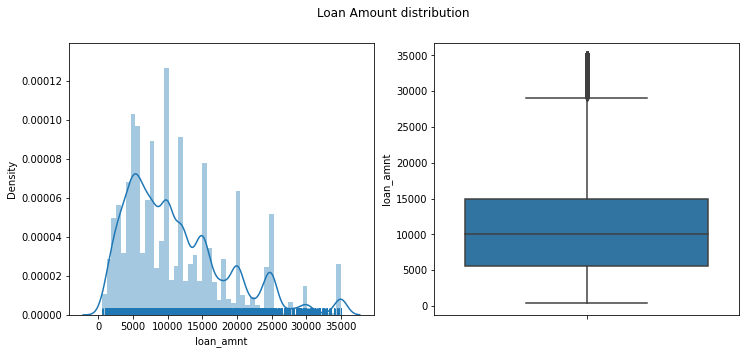

In [24]:
plot_univariant('loan_amnt','Loan Amount distribution')

From the above plots, more number of people took loan amount of 10000, and also meadian of distribution is 10000. And very few people took more than 30000 loan amount.

loan_status

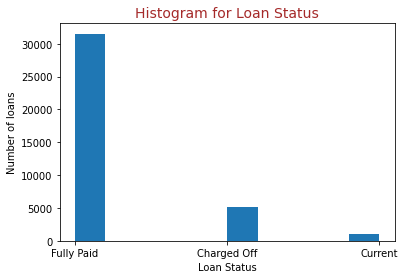

In [25]:
#Plt histogram for loan_Status to check the totally paid and charged off loans
plt.hist(loan_data.loan_status)
plt.title("Histogram for Loan Status",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("Loan Status")
plt.ylabel("Number of loans")
plt.show()

we can see that most of the charged off are under 5000

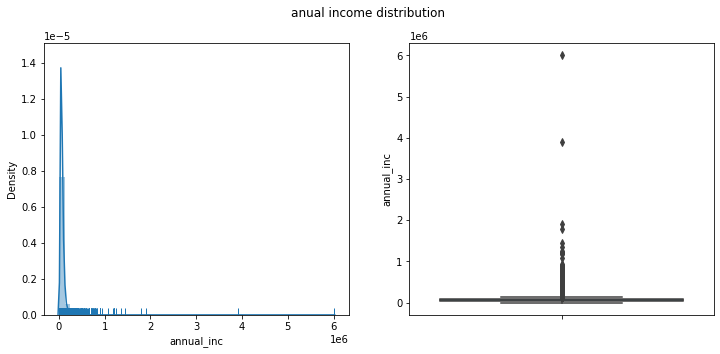

In [26]:
plot_univariant("annual_inc","anual income distribution")

here we can see that there are some outliers int he annual income

In [27]:
# Remove the outliers between 99% to 100%
loan_data = loan_data[loan_data["annual_inc"] < loan_data["annual_inc"].quantile(0.99)]
loan_data.annual_inc.describe()

count     37452.000000
mean      66238.777376
std       35157.318742
min        4000.000000
25%       41280.000000
50%       60000.000000
75%       82000.000000
max      234996.000000
Name: annual_inc, dtype: float64

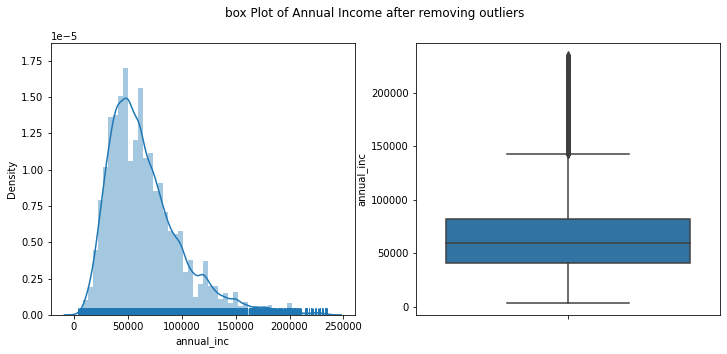

In [28]:
plot_univariant("annual_inc","box Plot of Annual Income after removing outliers")

now we can see there are no outliers in the anual income column 

funded_amnt

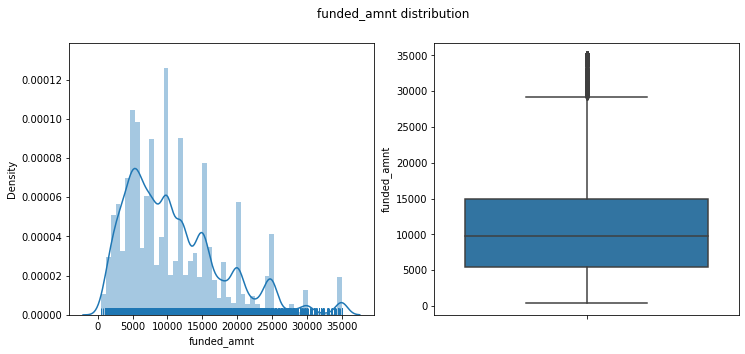

In [29]:
plot_univariant("funded_amnt","funded_amnt distribution")

we can observe that there are no outliers and the funded_amnt and loan_amt are preaty much similer

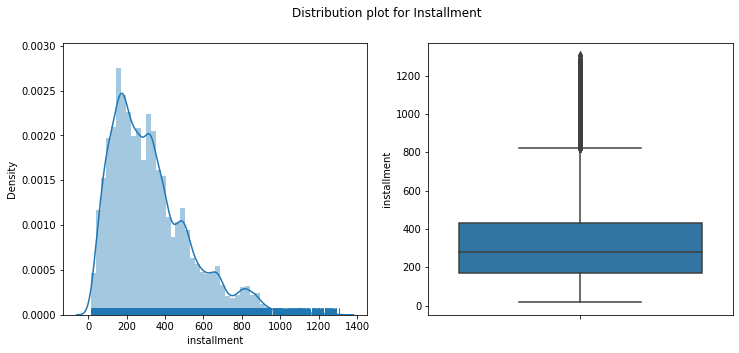

In [30]:
plot_univariant("installment","Distribution plot for Installment")

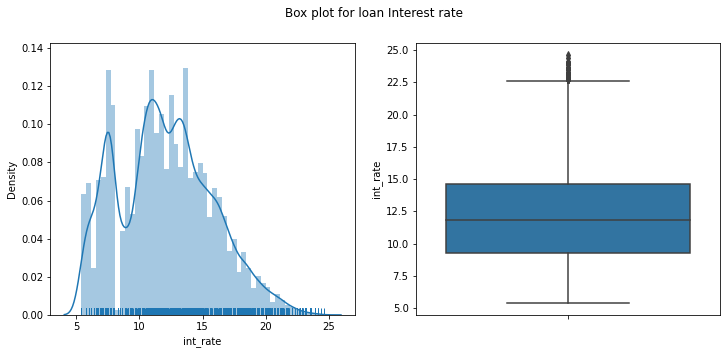

In [31]:
plot_univariant("int_rate","Box plot for loan Interest rate")

there are only vey few outliers

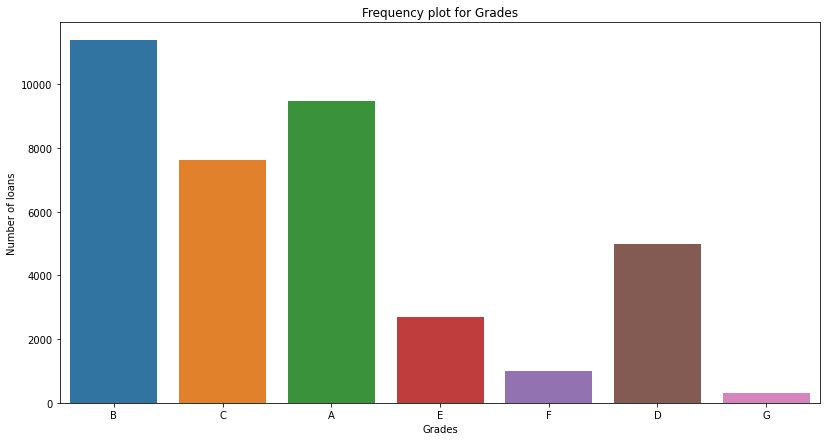

In [32]:
plot_univariant_countplot(loan_data["grade"],"Frequency plot for Grades","Grades","Number of loans")

Majority of the loan given were of Grade B then Grade A and soo on

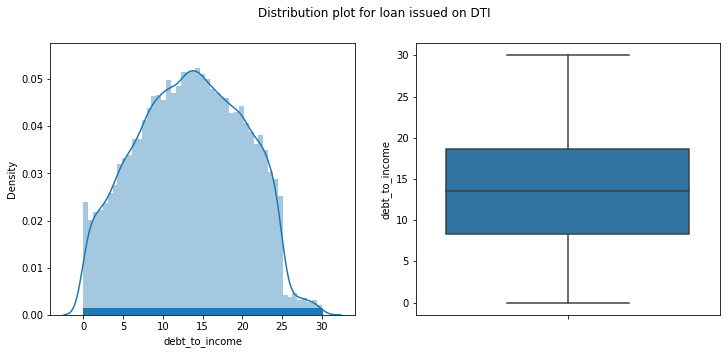

In [33]:
plot_univariant("debt_to_income","Distribution plot for loan issued on DTI")

there are no outliers in this DTI

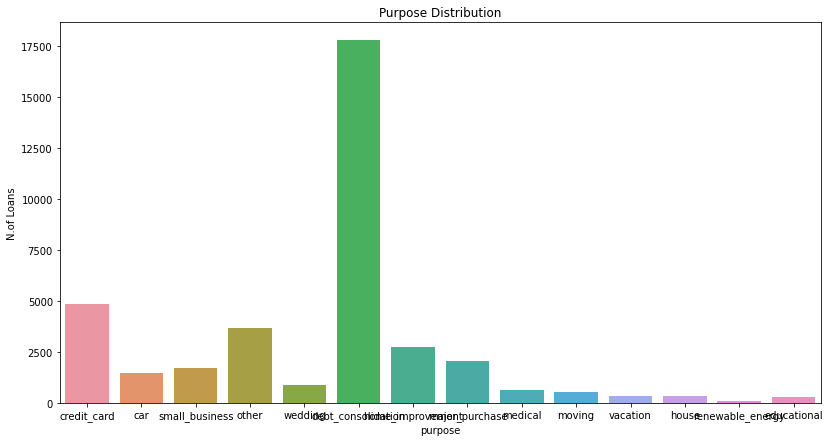

In [34]:
plot_univariant_countplot(loan_data["purpose"],"Purpose Distribution","purpose","N.of Loans",)

the loans taken are more on debt_consolidation

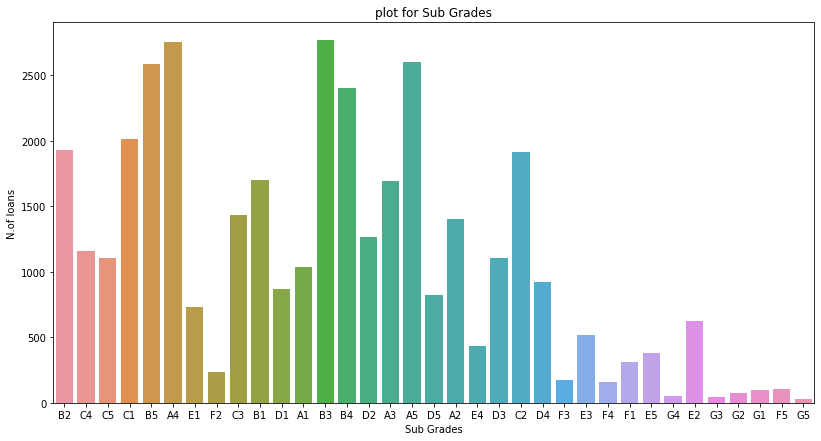

In [35]:
plot_univariant_countplot(loan_data["sub_grade"],"plot for Sub Grades","Sub Grades","N.of loans")

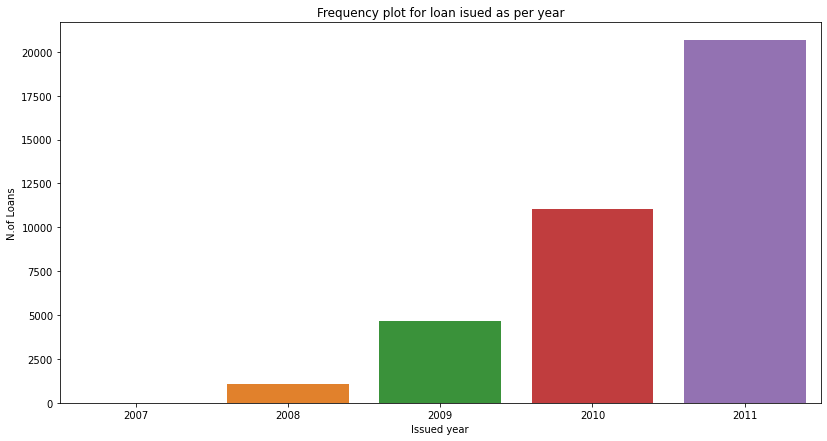

In [36]:
plot_univariant_countplot(loan_data["issue_d"].dt.year,"Frequency plot for loan isued as per year","Issued year","N.of Loans")

the issuing of loans has been increased during the years

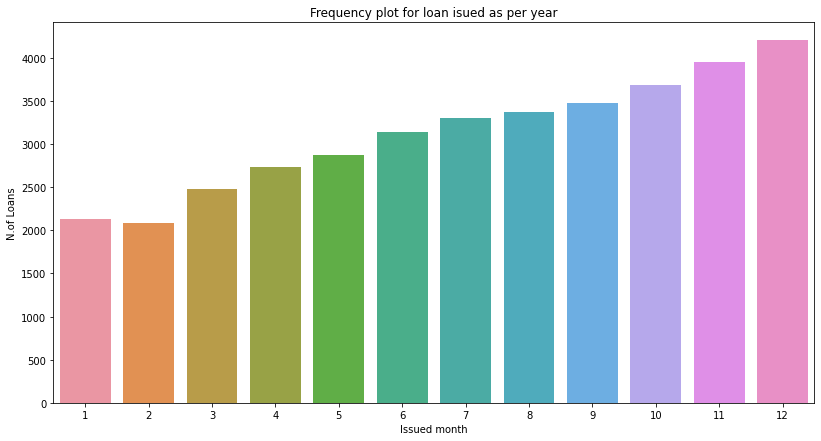

In [37]:
plot_univariant_countplot(loan_data["issue_d"].dt.month,"Frequency plot for loan isued as per year","Issued month","N.of Loans")

there is linear increase

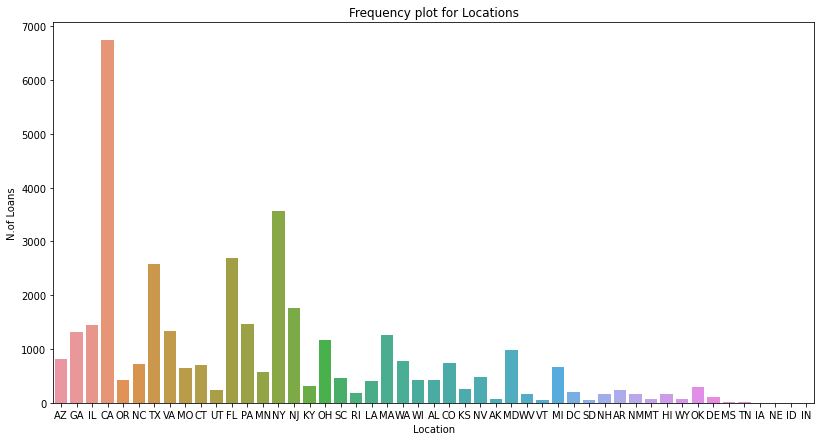

In [38]:
plot_univariant_countplot(loan_data['addr_state'],"Frequency plot for Locations","Location","N.of Loans")

state CA gave so many loans

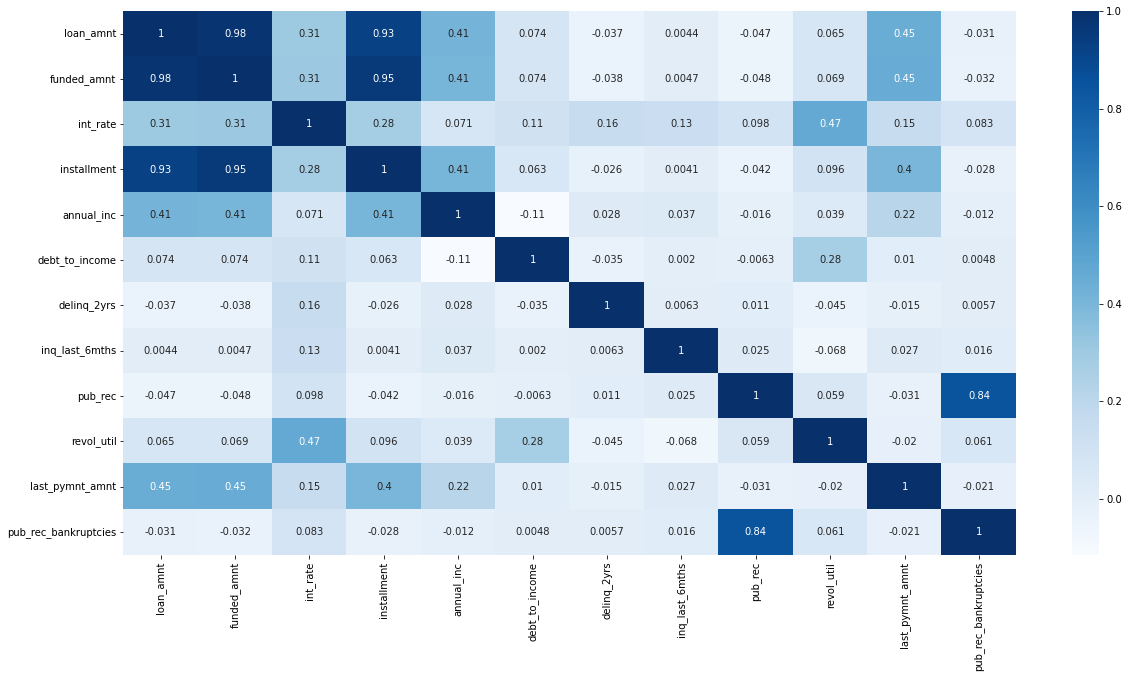

In [39]:
#correlation between variables
plt.figure(figsize=(20,10))
corr=sns.heatmap(loan_data.corr(),annot=True,cmap='Blues')
plt.show()

Installment and loan_amount are highly correlated.

Interest rates are high for people with high revol utilisation.

In [40]:
loan_data['issued_year'] = loan_data["issue_d"].dt.year
loan_data['issued_month'] = loan_data["issue_d"].dt.month

<Figure size 1440x720 with 0 Axes>

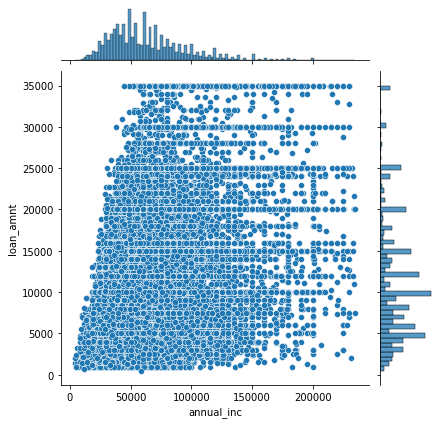

In [41]:
plt.figure(figsize=(20,10))
sns.jointplot(loan_data.annual_inc,loan_data.loan_amnt)

<Figure size 1440x720 with 0 Axes>

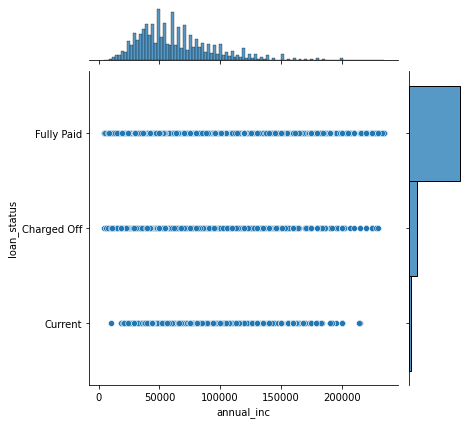

In [42]:
plt.figure(figsize=(20,10))
sns.jointplot(loan_data.annual_inc,loan_data.loan_status)

<Figure size 1440x720 with 0 Axes>

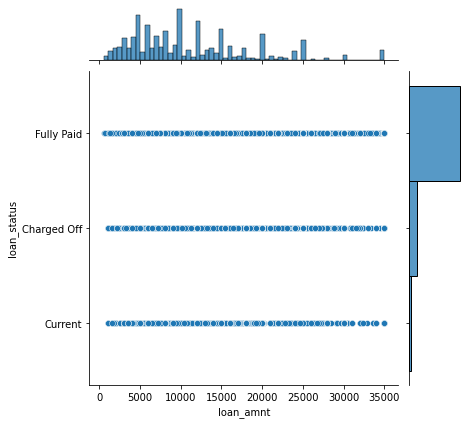

In [43]:
plt.figure(figsize=(20,10))
sns.jointplot(loan_data.loan_amnt,loan_data.loan_status)

<Figure size 1440x720 with 0 Axes>

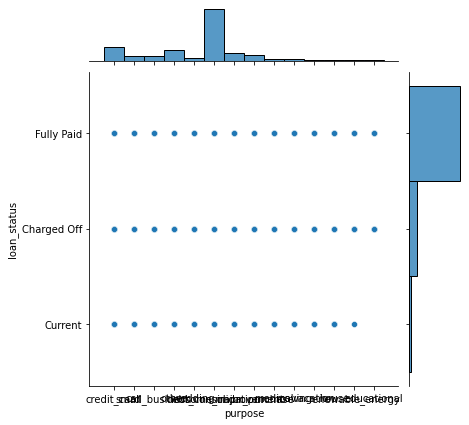

In [44]:
plt.figure(figsize=(20,10))
sns.jointplot(loan_data.purpose,loan_data.loan_status)

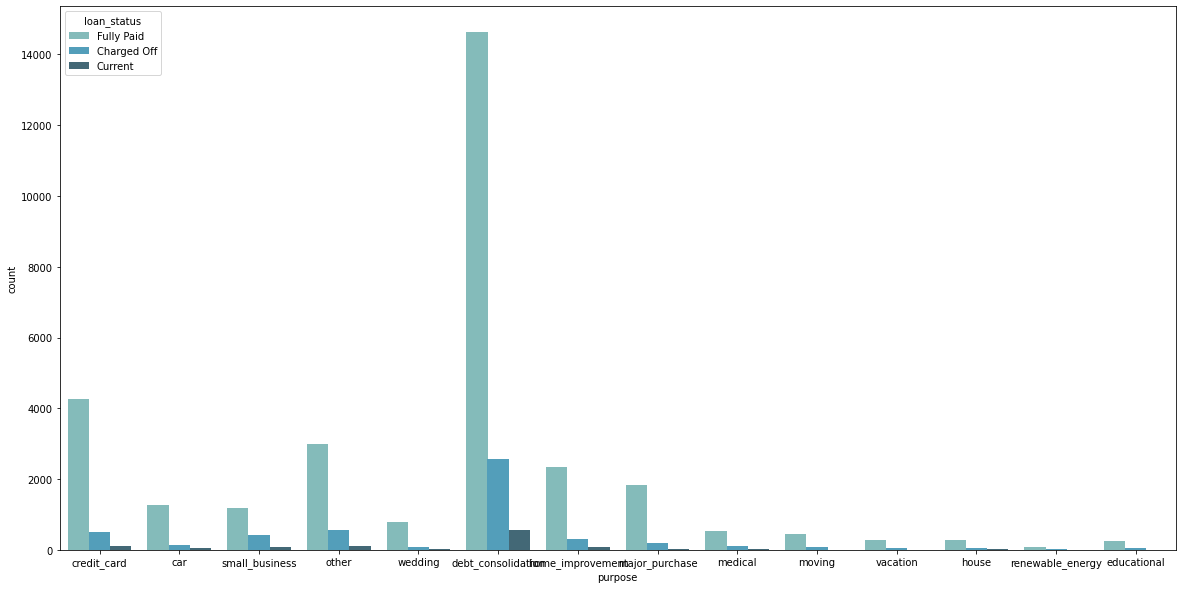

In [45]:
plt.figure(figsize=(20,10))
sns.countplot(x="purpose",data=loan_data,hue='loan_status',palette='GnBu_d')

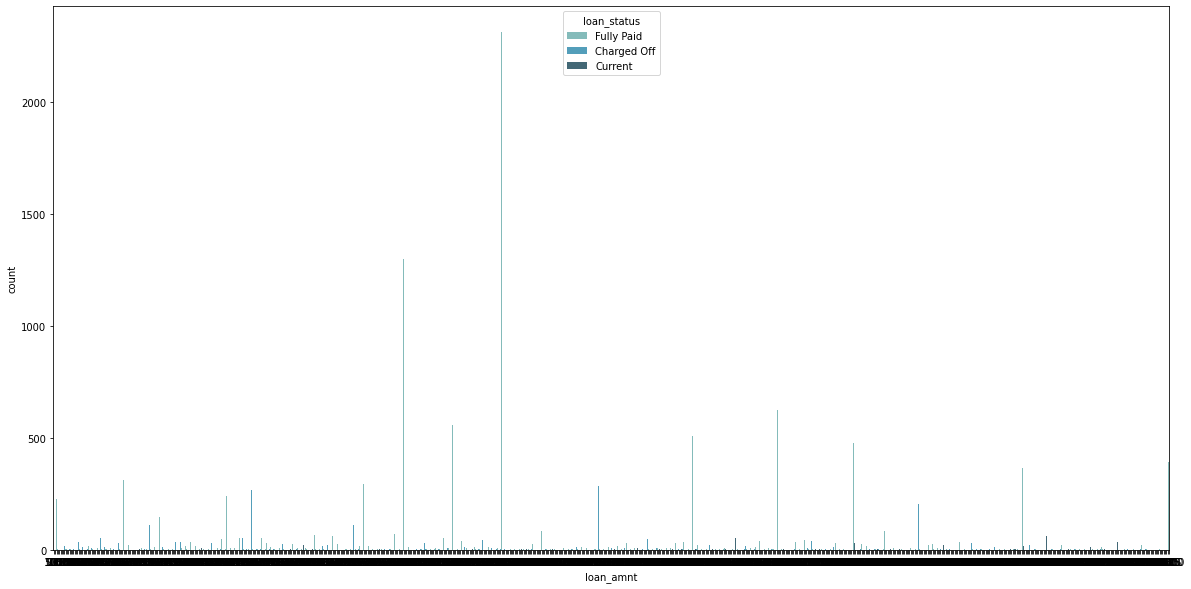

In [46]:
plt.figure(figsize=(20,10))
sns.countplot(x="loan_amnt",data=loan_data,hue='loan_status',palette='GnBu_d')

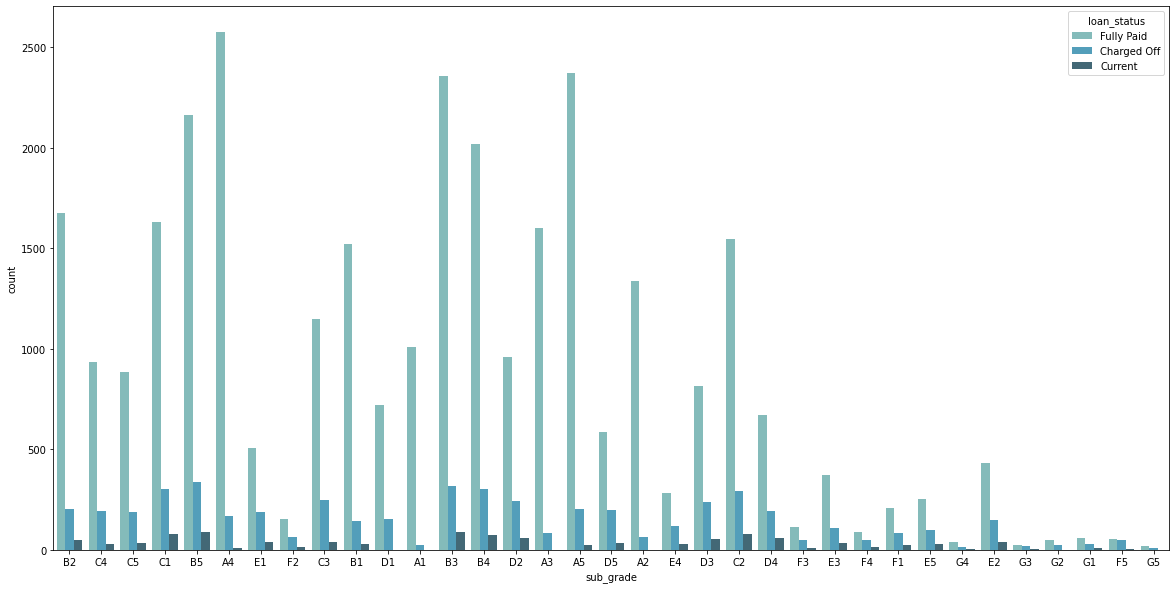

In [47]:
plt.figure(figsize=(20,10))
sns.countplot(x="sub_grade",data=loan_data,hue='loan_status',palette='GnBu_d')

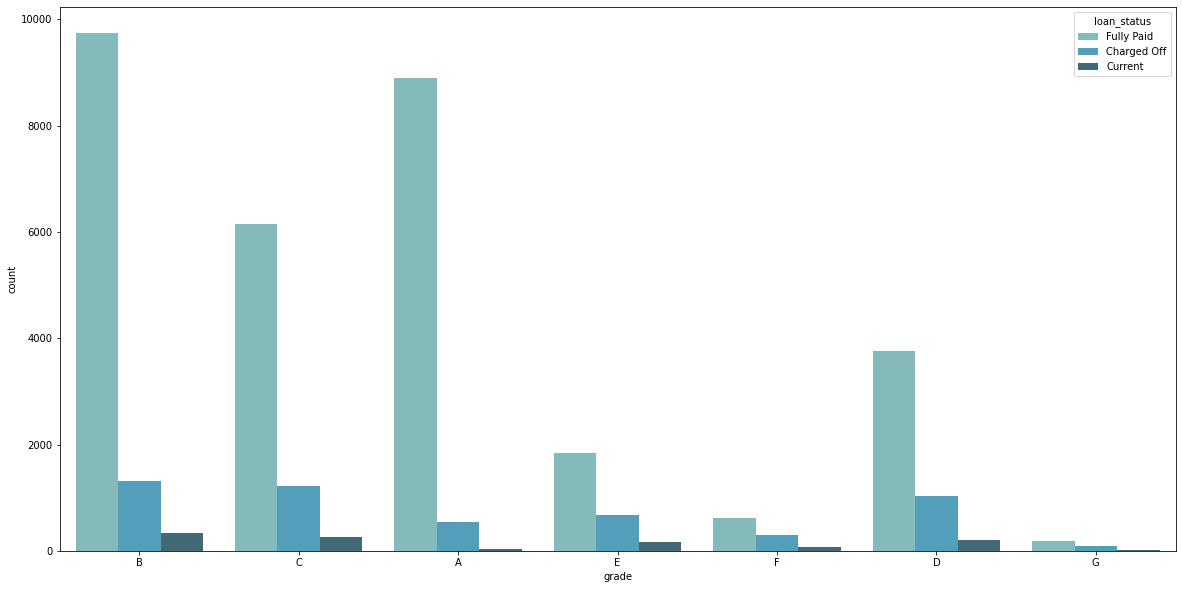

In [48]:
plt.figure(figsize=(20,10))
sns.countplot(x="grade",data=loan_data,hue='loan_status',palette='GnBu_d')

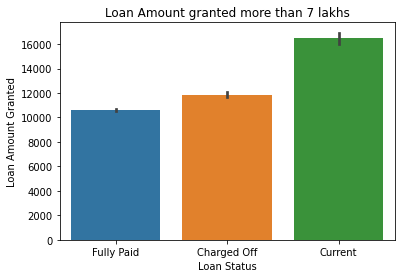

In [49]:
sns.barplot(x='loan_status', y='funded_amnt', data=loan_data)
plt.title('Loan Amount granted more than 7 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()

#observation
After analyzing the data, below features were most indicatve of Defaulting Customers:-

1.interest_rate
2.annual_income
3.loan amount
4.funded Amount
5.Purpose
6.Grades/Subgrades